In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\dataset\\house price data\\Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df2=df1.drop(['area_type','availability','society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [6]:
#begin data cleaning process
#first handle null values that is check how many values are null for each feature and compare it with total rows size if those are very small compared to total rows then u can safely drop them else u can take median and fill them with mean
df2.isnull().sum()
df2['balcony']=df2['balcony'].fillna(df2['balcony'].median())
df3=df2.dropna()
df3.isnull().sum()
df3

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [7]:
df3.shape

(13246, 6)

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
#i have to normalize data in size column as some have 2 bhk and some have 2 bedroom 
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))
df3.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10620\2169407216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [10]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
df3[df3.bhk>10]

,location,size,total_sqft,bath,balcony,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,3.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,0.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,2.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,2.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,3.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,0.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,2.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,2.0,150.0,11


In [12]:
# see there are inequalitites in data (error data) like house with 43 bedroom has only 2400 sqft 
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3['total_sqft'].apply(isFloat)].head(20)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [14]:
def sqftToNum(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
df3['total_sqft']=df3['total_sqft'].apply(sqftToNum)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10620\1787397809.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft']=df3['total_sqft'].apply(sqftToNum)


In [15]:
# df3['total_sqft']=df3['total_sqft'].apply(sqftToNum)

In [16]:
df3['total_sqft'].head(10)

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
5    1170.0
6    2732.0
7    3300.0
8    1310.0
9    1020.0
Name: total_sqft, dtype: float64

In [17]:
df3.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
balcony           0.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [18]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [19]:
df3=df3.dropna(subset=['total_sqft'])

In [20]:
# df3.loc[410]

In [21]:
df3.head(20)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,2.0,370.00,6


In [22]:
df3['total_sqft'].isnull().sum()

0

In [23]:
#now we perform feature engineering , adding new features or deleting some features accordingly 
df4=df3.copy()
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4.head(20)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [24]:
len(df4['location'].unique())


1298

In [25]:
#u can see that there are too many location which increases dimensionality of our problem we have to reduce them . to reduce them 
# we keep a threshold and whose data points are less than that threshold are made into other category
df4['location']=df4['location'].apply(lambda x: x.strip())
location_stats= df4.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

In [26]:
location_stats.sort_values(ascending=False)

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [27]:
location_stats_less_than_10=location_stats[location_stats<=10]
len(location_stats_less_than_10)

1047

In [28]:
df4.location=df4.location.apply(lambda x: 'other' if x  in location_stats_less_than_10 else x)

In [29]:
len(df4.location.unique())

241

In [30]:
df4.shape

(13200, 8)

In [31]:
## now we work on removing outliers
## one outlier is sqft per bedroom from data we can say that we need atleast 300 sqft for a bedroom
df4[(df4['total_sqft']/df4['bhk']<300)]
df4=df4[~(df4['total_sqft']/df4['bhk']<300)]
df4.shape

(12456, 8)

In [32]:
## another outlier is price per sqft 
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean=np.mean(subdf['price_per_sqft'])
        st=np.std(subdf['price_per_sqft'])
        reduced_df=subdf[(subdf.price_per_sqft>mean-st) & (subdf.price_per_sqft<=mean+st)]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4.shape

(12456, 8)

In [34]:
df5=remove_pps_outliers(df4)

In [35]:
df5.shape

(10242, 8)

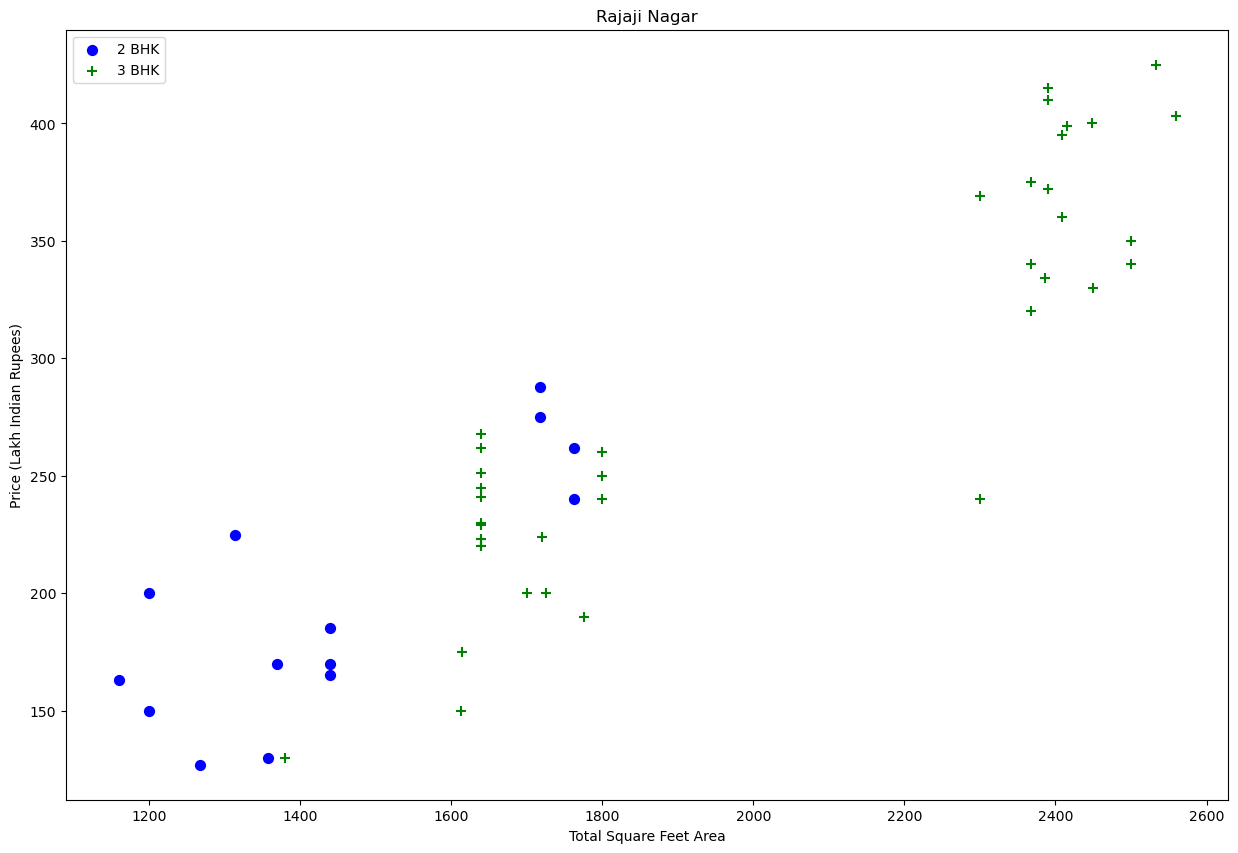

In [36]:
## we know that in a same area the price of 2bhk should be less than 3 bhk so like these outliers have to be removed. so we create a plot to detect these outliers
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) &( df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df5,"Rajaji Nagar")

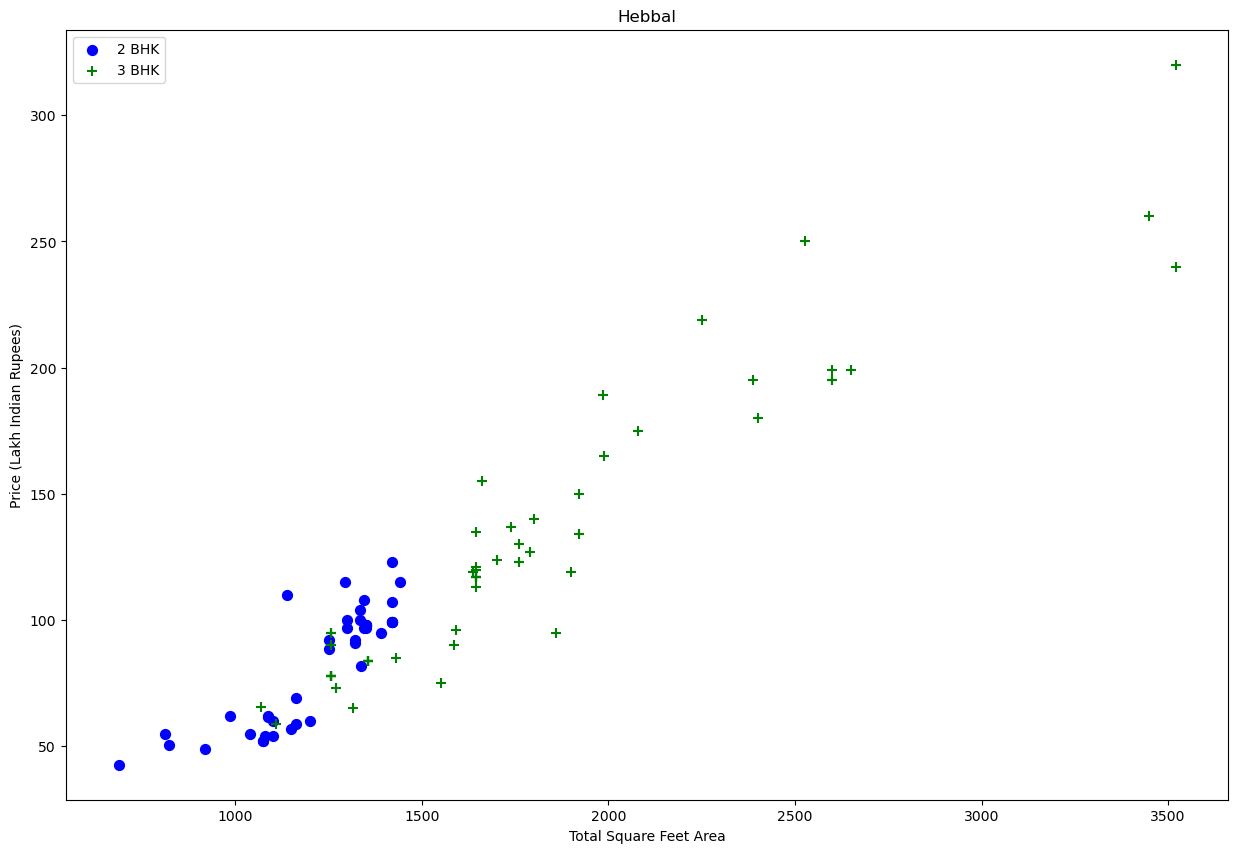

In [37]:
plot_scatter_chart(df5,'Hebbal')

In [38]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6=remove_bhk_outliers(df5)



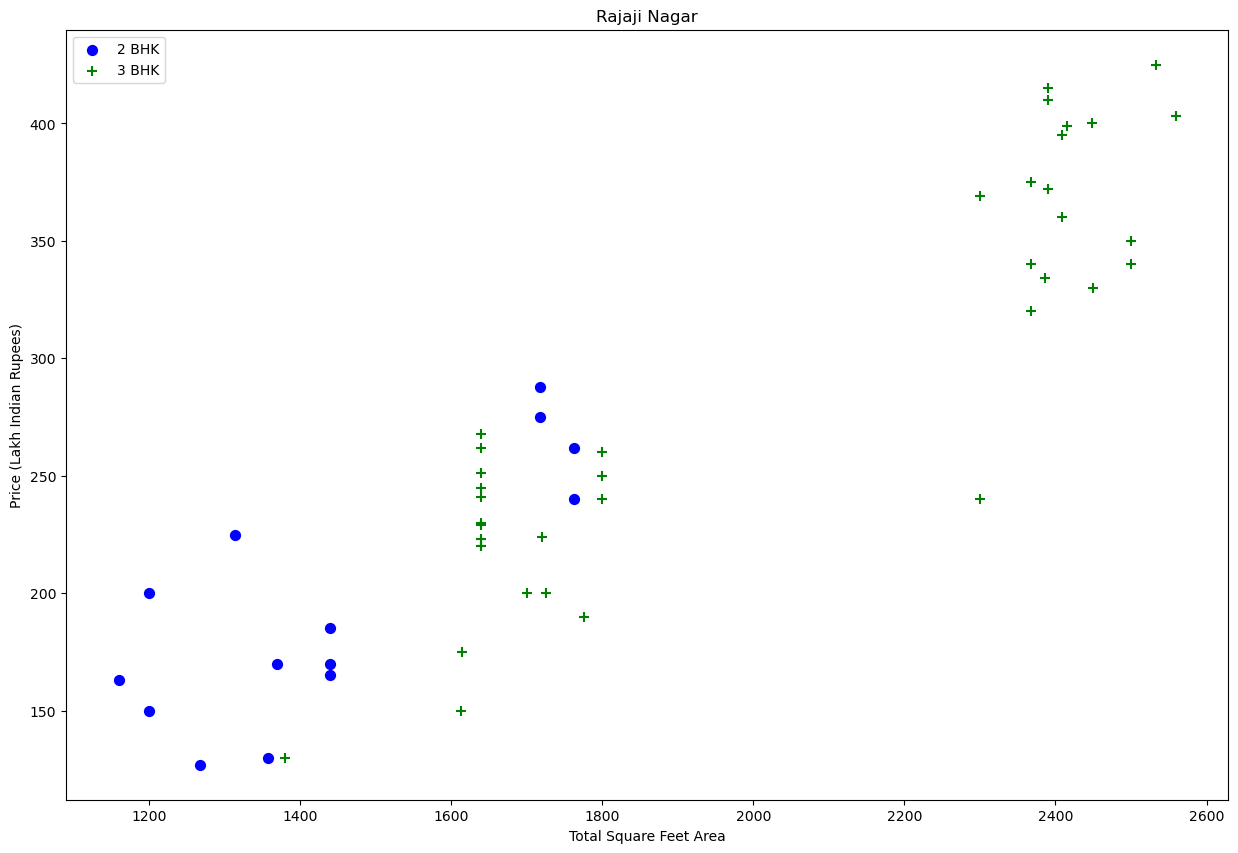

In [39]:
plot_scatter_chart(df5,"Rajaji Nagar")

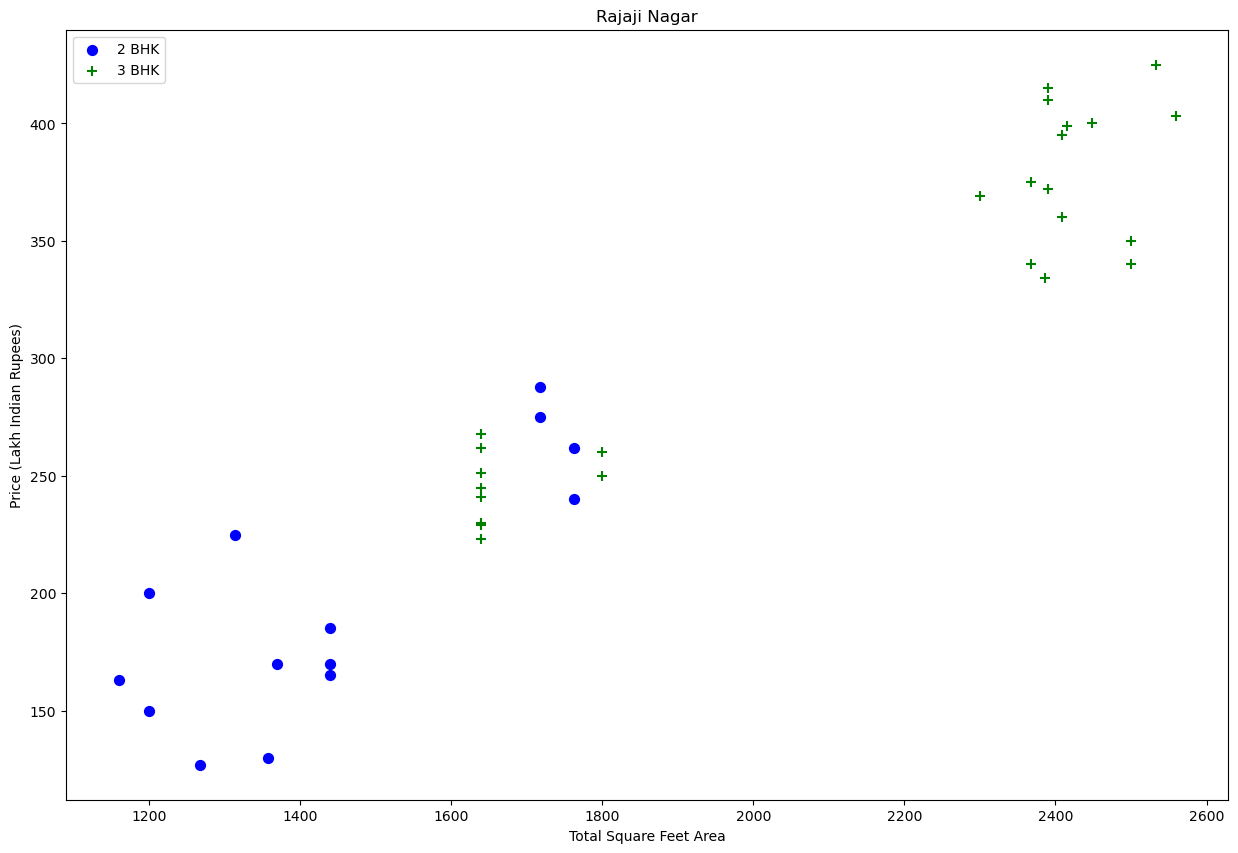

In [40]:
plot_scatter_chart(df6,"Rajaji Nagar")

In [41]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df6[df6.bath>8]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
3775,KR Puram,9 BHK,4600.0,9.0,2.0,200.0,9,4347.826087
5113,Mico Layout,9 BHK,5000.0,9.0,3.0,210.0,9,4200.000000
5277,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
5660,Raja Rajeshwari Nagar,9 Bedroom,3600.0,9.0,3.0,240.0,9,6666.666667
8022,other,11 BHK,5000.0,9.0,3.0,360.0,11,7200.000000
8408,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
8483,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
8758,other,9 BHK,4500.0,9.0,2.0,500.0,9,11111.111111
9306,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000


Text(0, 0.5, 'count')

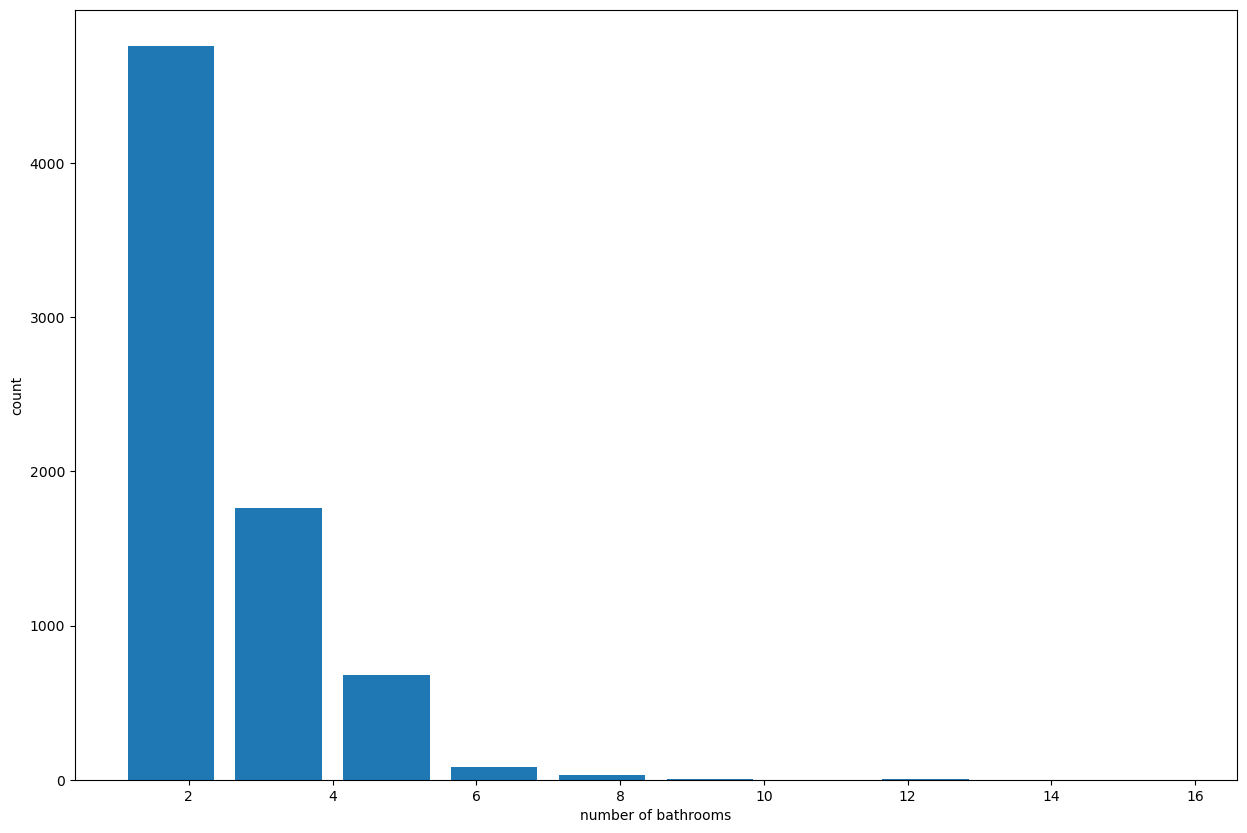

In [43]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

In [44]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [45]:
df7=df6[df6.bath<=df6.bhk+2]
df7.shape

(7313, 8)

In [46]:
## now we had cleaned up our data now we have to train model
#first we have to change location column as model cannot interpret text
dummies=pd.get_dummies(df7.location)
df8=pd.concat([df7,dummies.drop('other',axis='columns')],axis="columns")
df8.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,4 BHK,2750.0,4.0,0.0,413.0,4,15018.181818,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,4 BHK,2450.0,4.0,2.0,368.0,4,15020.408163,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3,8906.666667,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,2.0,85.0,5,5666.666667,0,1,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,1.0,210.0,3,10169.491525,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df8.drop('location',axis='columns')

,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,2 BHK,1200.0,2.0,3.0,70.0,2,5833.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1 BHK,1800.0,1.0,1.0,200.0,1,11111.111111,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,2 BHK,1353.0,2.0,2.0,110.0,2,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1 Bedroom,812.0,1.0,0.0,26.0,1,3201.970443,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df8=df8.drop('location',axis='columns')

In [49]:
df8.head(10)

,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4 BHK,2750.0,4.0,0.0,413.0,4,15018.181818,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4 BHK,2450.0,4.0,2.0,368.0,4,15020.408163,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3 BHK,1875.0,3.0,1.0,167.0,3,8906.666667,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,5 Bedroom,1500.0,5.0,2.0,85.0,5,5666.666667,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,3 BHK,2065.0,4.0,1.0,210.0,3,10169.491525,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X=df8.drop('price',axis='columns')


In [51]:
X=X.drop('size',axis='columns')

In [52]:
y=df8.price

In [53]:
X

,total_sqft,bath,balcony,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,3.0,2,5833.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1800.0,1.0,1.0,1,11111.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1353.0,2.0,2.0,2,8130.081301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,0.0,1,3201.970443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10233     70.0
10234    200.0
10237    110.0
10238     26.0
10241    400.0
Name: price, Length: 7313, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [57]:
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
lr.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [59]:
lr.score(X_test,y_test)

0.9106004839919419

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.95198637, 0.9371538 , 0.94026833, 0.90921619, 0.94782512])

In [61]:
from  sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

,model,best_score,best_params
0,linear_regression,0.937290,{'normalize': False}
1,lasso,0.923193,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.911702,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [66]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [67]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))